# Supervised Machine Learning

In [67]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from plotly import express as px
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import plot_tree, export_text
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve

## Day 1
* First (dummy) linear regression example - houses dataset
* Train-test split
* Regression evaluation (MAPE)
* Other models: Decision Tree, XGBoost, RandomForest

In [2]:
df_houses = pd.read_csv('houses.csv')

In [3]:
X = df_houses[['area', 'bedrooms', 'bathrooms', 'parking']]
Y = df_houses['price']

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.25, random_state=7986)

In [5]:
# Train - validation - test split (we will see it again later on, along with "cross-validation")
#
# X_work, X_test, Y_work, Y_test = train_test_split(X, Y, test_size=.25, random_state=7986)
# X_train, X_val, Y_train, Y_val = train_test_split(X_work, Y_work, test_size=.25, random_state=68)

### A simple linear regression to predict the price of a house

In [6]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [7]:
Y_pred = model.predict(X_test)

In [8]:
errors = (Y_test - Y_pred).abs() / Y_test

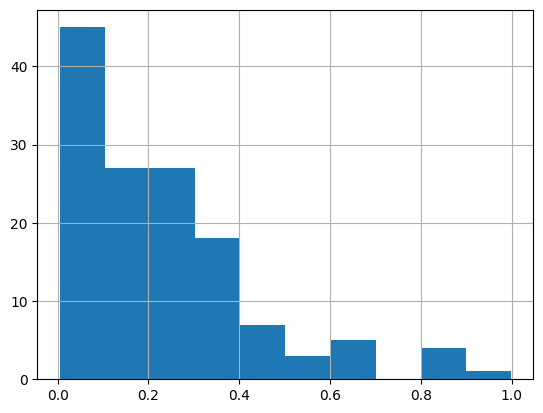

In [9]:
errors.hist();

In [10]:
# MAPE on test set
errors.mean()

0.22972385602922102

Compare the MAPE (Mean Absolute Percentage Error) on the train dataset and on the test dataset to see whether or not it is overfitting. Linear regression is not (or not much).

In [11]:
Y_pred_train = model.predict(X_train)
train_errors = (Y_train - Y_pred_train).abs() / Y_train
train_errors.mean()

0.22604164425542017

### Same example but with Decision Tree

In [12]:
model = DecisionTreeRegressor(max_depth=1000)
model.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=1000)

It is definitely overfitting!

In [13]:
Y_pred_train = model.predict(X_train)
train_errors = (Y_train - Y_pred_train).abs() / Y_train
train_errors.mean()

0.028947985313980355

In [14]:
Y_pred = model.predict(X_test)
errors = (Y_test - Y_pred).abs() / Y_test
errors.mean()

0.2721947487524968

Visualize the decision tree (on a smaller example).

In [15]:
model_small = DecisionTreeRegressor(max_depth=3)
model_small.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=3)

In [16]:
print(export_text(model_small, feature_names=X.columns.tolist()))

|--- area <= 5954.00
|   |--- bathrooms <= 1.50
|   |   |--- area <= 4020.00
|   |   |   |--- value: [3458562.80]
|   |   |--- area >  4020.00
|   |   |   |--- value: [4323877.66]
|   |--- bathrooms >  1.50
|   |   |--- area <= 3993.00
|   |   |   |--- value: [4381192.31]
|   |   |--- area >  3993.00
|   |   |   |--- value: [5976419.35]
|--- area >  5954.00
|   |--- bathrooms <= 1.50
|   |   |--- parking <= 0.50
|   |   |   |--- value: [4711518.52]
|   |   |--- parking >  0.50
|   |   |   |--- value: [5969216.98]
|   |--- bathrooms >  1.50
|   |   |--- area <= 7370.00
|   |   |   |--- value: [6857854.84]
|   |   |--- area >  7370.00
|   |   |   |--- value: [8813000.00]



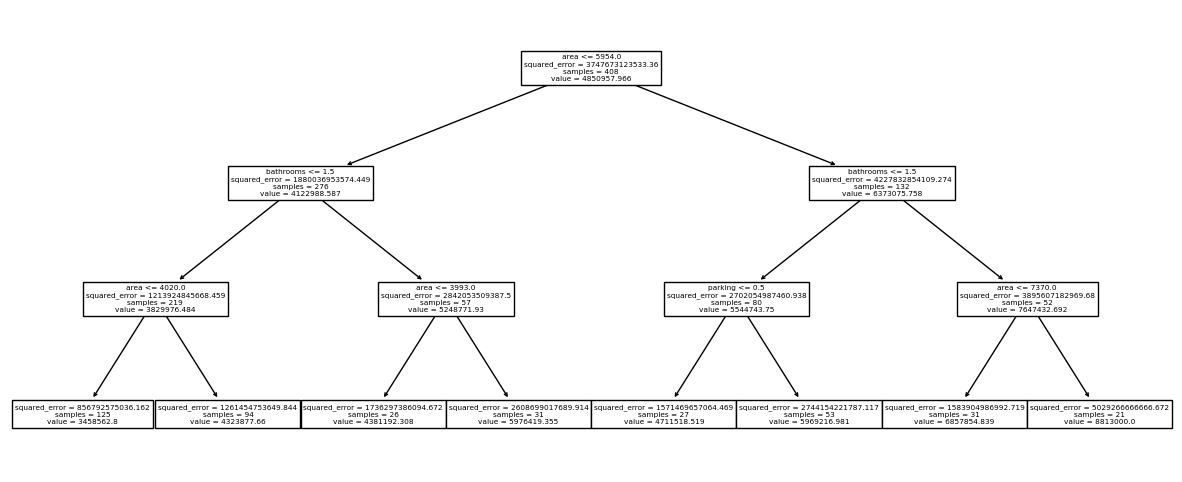

In [17]:
plt.figure(figsize=(15, 6))
plot_tree(model_small, feature_names=X.columns);

## Day 2
* Classification example - Titanic dataset
* Classification evaluation (precision, recall, ROC curve)
* Cross-validation
* Grid search for hyperparameter tuning

### Classification - prepare the data set and split train and test

In [18]:
df_titanic = pd.read_csv('titanic.csv', sep=';')
df_titanic['is_female'] = df_titanic['Sex'] == "female"

In [19]:
FEATURES = ['Age', 'Fare', 'Pclass', 'is_female']
df_titanic.dropna(subset=FEATURES, inplace=True)

In [20]:
X = df_titanic[FEATURES]
Y = df_titanic['Survived']

In [107]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=432)

### Logistic Regression

In [22]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

### Evaluate a classifier

In [23]:
Y_pred = model.predict(X_test)

In [24]:
# Accuracy
(Y_pred == Y_test).mean()
accuracy_score(Y_test, Y_pred)

0.7877094972067039

In [25]:
# Error rate
(Y_pred != Y_test).mean()

0.2122905027932961

In [26]:
# Precision
(Y_pred & Y_test).sum() / Y_pred.sum()
precision_score(Y_test, Y_pred)

0.7702702702702703

In [27]:
# Recall
(Y_pred & Y_test).sum() / Y_test.sum()
recall_score(Y_test, Y_pred)

0.7307692307692307

In [28]:
Y_score = model.predict_proba(X_test)[:,1]

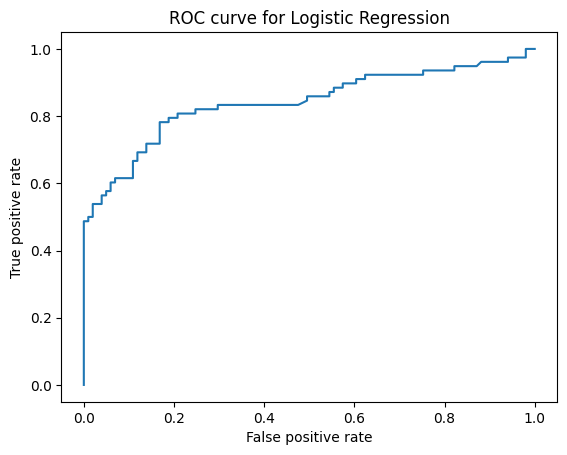

In [29]:
# ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_score)
plt.title("ROC curve for Logistic Regression")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.plot(fpr, tpr);

In [30]:
THRESHOLD = .7
Y_pred = Y_score > THRESHOLD
precision_score(Y_test, Y_pred), recall_score(Y_test, Y_pred)

(0.9130434782608695, 0.5384615384615384)

In [31]:
# AUC
roc_auc_score(Y_test, Y_score)

0.8416476263010917

### Classification with Decision Tree

In [32]:
model = DecisionTreeClassifier(max_depth=None)  # grow as deep a tree as possible
model.fit(X_train, Y_train)
Y_score = model.predict_proba(X_test)[:,1]
roc_auc_score(Y_test, Y_score)

0.7372429550647374

In [33]:
# Overfitting ?
Y_score_train = model.predict_proba(X_train)[:,1]
roc_auc_score(Y_train, Y_score_train)

0.9999707926864887

In [34]:
model = DecisionTreeClassifier(max_depth=4)
model.fit(X_train, Y_train)
Y_score = model.predict_proba(X_test)[:,1]
roc_auc_score(Y_test, Y_score)

0.8474866717440975

In [35]:
print(export_text(model, feature_names=model.feature_names_in_.tolist()))

|--- is_female <= 0.50
|   |--- Pclass <= 1.50
|   |   |--- Age <= 53.50
|   |   |   |--- Fare <= 25.94
|   |   |   |   |--- class: 0
|   |   |   |--- Fare >  25.94
|   |   |   |   |--- class: 1
|   |   |--- Age >  53.50
|   |   |   |--- Fare <= 35.08
|   |   |   |   |--- class: 0
|   |   |   |--- Fare >  35.08
|   |   |   |   |--- class: 0
|   |--- Pclass >  1.50
|   |   |--- Age <= 13.00
|   |   |   |--- Fare <= 26.95
|   |   |   |   |--- class: 1
|   |   |   |--- Fare >  26.95
|   |   |   |   |--- class: 0
|   |   |--- Age >  13.00
|   |   |   |--- Fare <= 51.70
|   |   |   |   |--- class: 0
|   |   |   |--- Fare >  51.70
|   |   |   |   |--- class: 0
|--- is_female >  0.50
|   |--- Pclass <= 2.50
|   |   |--- Age <= 2.50
|   |   |   |--- Fare <= 88.78
|   |   |   |   |--- class: 1
|   |   |   |--- Fare >  88.78
|   |   |   |   |--- class: 0
|   |   |--- Age >  2.50
|   |   |   |--- Fare <= 28.86
|   |   |   |   |--- class: 1
|   |   |   |--- Fare >  28.86
|   |   |   |   |--- class

### Model selection: grid search and cross validation

In [109]:
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid={'max_depth': range(1, 30)},
    cv=3,
    scoring='roc_auc',
    return_train_score=True,
)

In [91]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 30)}, return_train_score=True,
             scoring='roc_auc')

In [92]:
grid_search.best_params_

{'max_depth': 4}

In [93]:
grid_search.best_score_

0.8464585308087128

In [94]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=4)

In [97]:
grid_search_results = pd.DataFrame(grid_search.cv_results_).rename(columns={'mean_test_score': 'mean_validation_score'})
grid_search_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_validation_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.001088,0.000190,0.001056,0.000072,1,{'max_depth': 1},0.719679,0.796561,0.786692,0.767644,0.034155,24,0.791704,0.753112,0.758028,0.767614,0.017152
1,0.001134,0.000216,0.001038,0.000179,2,{'max_depth': 2},0.767280,0.801587,0.839608,0.802825,0.029541,6,0.839287,0.830970,0.833021,0.834426,0.003538
2,0.000872,0.000050,0.000864,0.000035,3,{'max_depth': 3},0.851330,0.799471,0.862972,0.837924,0.027603,3,0.875656,0.867409,0.868909,0.870658,0.003587
3,0.000816,0.000007,0.000802,0.000013,4,{'max_depth': 4},0.840962,0.806614,0.891799,0.846459,0.034993,1,0.902194,0.906780,0.896014,0.901663,0.004411
4,0.000860,0.000008,0.000848,0.000079,5,{'max_depth': 5},0.871348,0.739749,0.916743,0.842614,0.075060,2,0.929754,0.934704,0.923628,0.929362,0.004530
5,0.000847,0.000017,0.000794,0.000009,6,{'max_depth': 6},0.858568,0.738823,0.885876,0.827756,0.063866,4,0.949959,0.952620,0.947941,0.950173,0.001916
6,0.000888,0.000032,0.000813,0.000042,7,{'max_depth': 7},0.829486,0.735384,0.872713,0.812528,0.057333,5,0.959492,0.967409,0.961206,0.962702,0.003401
7,0.000890,0.000034,0.000804,0.000006,8,{'max_depth': 8},0.838224,0.705291,0.849151,0.797555,0.065393,7,0.970262,0.985768,0.973207,0.976413,0.006724
8,0.000934,0.000033,0.000834,0.000063,9,{'max_depth': 9},0.795840,0.699603,0.855864,0.783769,0.064362,10,0.983490,0.994039,0.982893,0.986807,0.005119
9,0.000894,0.000009,0.000783,0.000008,10,{'max_depth': 10},0.782473,0.726058,0.854087,0.787539,0.052390,9,0.992660,0.997281,0.987523,0.992488,0.003986


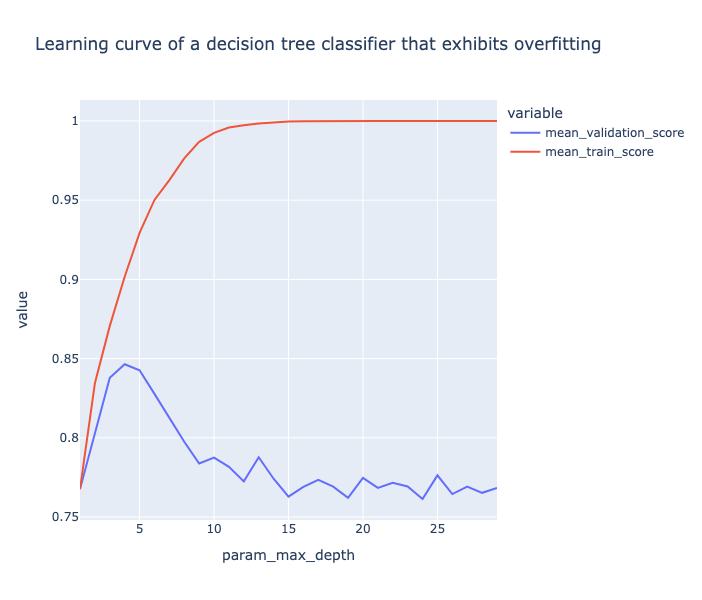

In [98]:
px.line(grid_search_results, x='param_max_depth', y=['mean_validation_score', 'mean_train_score'],
        title="Learning curve of a decision tree classifier that exhibits overfitting", height=600)

In [105]:
# Do this only at the very end
Y_score = grid_search.predict_proba(X_test)[:,1]  # takes the best model
roc_auc_score(Y_test, Y_score)

0.8474866717440975

## Day 3
* Dimensionality reduction
* Feature scaling
* Feature selection
* Handling inbalance

## Day 4
* Natural Language Processing (NLP): tokenization, stemming